# Word with infered dataset


In [34]:
# read predict file


def txt2dict(path_to_txt: str):
    image_text_dict = {}
# Open and read the text file
    with open(path_to_txt, 'r') as file:
        for line in file:
            # Split each line into key and value
            key, value = line.strip().split(' ')
            
            # Store the key-value pair in the dictionary
            image_text_dict[key] = value
    return image_text_dict

In [35]:
# read predict file
predict_test_file_paths = '/home/nguyen/NTT/OCR/ProPos/Predict/Predict_33000/resnet50_seq2seq_dataraw_300k_iter/prediction.txt'
# predict_file_paths = '/home/nguyen/NTT/OCR/ProPos/DATA/train_gt.txt'

dir_test_list = predict_test_file_paths.split('/')
predict_config = dir_test_list[len(dir_test_list) - 2]

image_text_dict_test = txt2dict(predict_test_file_paths)

## read  predict train



In [36]:
predict_train_file_paths = '/home/nguyen/NTT/OCR/ProPos/Predict/Predict_train/After_private/resnet_seq2seq_ema_train.txt'

predict_train_file_paths_dirs_list = predict_train_file_paths.split('/')

predict_train_file_paths_config = predict_train_file_paths_dirs_list[len(predict_train_file_paths_dirs_list) - 1]


dir_pred_train_list = predict_train_file_paths.split('/')
pred_train_config = dir_pred_train_list[len(dir_pred_train_list) - 1]


image_text_dict_pred_train = txt2dict(predict_train_file_paths)

In [37]:
len(image_text_dict_pred_train)

103000

## read adjusted gt


In [38]:
adjusted_gt_file_paths = '/home/nguyen/NTT/OCR/ProPos/DATA/fixed_gt_refer_to_83k.txt'

dir_adjusted_gt_list = adjusted_gt_file_paths.split('/')
adjusted_gt_config = dir_adjusted_gt_list[len(dir_adjusted_gt_list) - 1]

image_text_dict_adjusted_gt = txt2dict(adjusted_gt_file_paths)

In [39]:
image_text_dict_adjusted_gt['train_img_0.jpg']

'Thỗn'

## read clusters



In [40]:
import json
import matplotlib.pyplot as plt

epoch = 19
Num_of_Cluster = 120
Model_name = f'byol_{epoch}'
width = 70
height = 8

path_to_json_file = f'/home/nguyen/NTT/OCR/ProPos/Cluster_folder/ProNos_resnet50_v2/{Model_name}/clust_folder_{Model_name}_{Num_of_Cluster}.json'
with open(path_to_json_file, 'r') as json_file_cluster_folder:
    clust_folder = json.load(json_file_cluster_folder)
    
clust_folder = dict(sorted(clust_folder.items(), key=lambda item: int(item[0])))

In [41]:
import os

def creat_dir(path: str):
    if not os.path.exists(path):
        os.mkdir(path)

In [42]:
# create folder to save
import os



path_chart_save = f'/home/nguyen/NTT/OCR/ProPos/Cluster_folder/ProNos_resnet50_v2/{Model_name}/'
config_chart_name = f'{pred_train_config}'

save_figure_path = path_chart_save + config_chart_name
creat_dir(save_figure_path)
save_figure_path = save_figure_path + f'/{Num_of_Cluster}'
creat_dir(save_figure_path)

# Draw chart


In [43]:

# for cluster in clust_folder:
#[7:11] = 'test'
#[0:5] = 'train'

CLuster_list  = []
total_images_list = []
trains = []
tests = []
percentages_of_test_in_cluster_list = []
for cluster in clust_folder: 
    CLuster_list.append(cluster)
    total_images = len(clust_folder[cluster])
    total_images_list.append(total_images)
    # print(total_images)

    n_test = 0
    n_train = 0
    for file_name in clust_folder[cluster]:
        
        if file_name[7:11] == 'test':
            n_test += 1
        if file_name[0:5] == 'train':
            n_train += 1
        
    trains.append(n_train)
    tests.append(n_test)
    percentage_test = (n_test / total_images) *100
    percentages_of_test_in_cluster_list.append(round(percentage_test, 2))
    
    # print(f'train = {n_train} \n test = {n_test}')
    # assert n_test + n_train == total_images

## Analysis cluster error train_predict

In [44]:
list_predict_train_error = []
for image_name in image_text_dict_pred_train:
    if image_text_dict_adjusted_gt[image_name] != image_text_dict_pred_train[image_name]:
        list_predict_train_error.append(image_name)

print(len(list_predict_train_error))
error_clust_folder = {}
for cluster in CLuster_list:
    # print(cluster)
    error_clust_folder[cluster] = []
    
    for error in list_predict_train_error:
        if error in clust_folder[cluster]:
            error_clust_folder[cluster].append(error)
            # list_predict_train_error.remove(error)

num_of_error_clust_dict = {}
for cluster in CLuster_list:
    num_of_error_clust_dict[cluster] = len(error_clust_folder[cluster])


2719


In [45]:
total_sum = 0

for key, value in num_of_error_clust_dict.items():
    total_sum += value

print(total_sum)

2719


In [46]:
print(list_predict_train_error[0])

train_img_33.jpg


In [47]:
#percentage of error intrain
percentage_train_error_dict = []

for i in range(len(CLuster_list)):
    percentage_train_error_dict.append(round(len(error_clust_folder[CLuster_list[i]])/trains[i], 2) * 100)

In [48]:
def plot_num_of_error_each_cluster(num_of_error_clust_dict: dict, CLuster_list: list):
    
    cluster = list(num_of_error_clust_dict.keys())
    num_of_error = list(num_of_error_clust_dict.values())

    title_name = 'error_clust_folder'
    # Create a bar chart
    plt.figure(figsize=(width, height))
    plt.bar(cluster, num_of_error, label = 'error')
    
    for i, value in enumerate(num_of_error):
        plt.text(i, value, str(value), ha='center', va='bottom', rotation = 90)
    # Add labels and title
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Bar Chart from Dictionary Data')
    plt.savefig(f'{save_figure_path}/{title_name}.png', dpi=300)
    # Show the chart
    # plt.show()

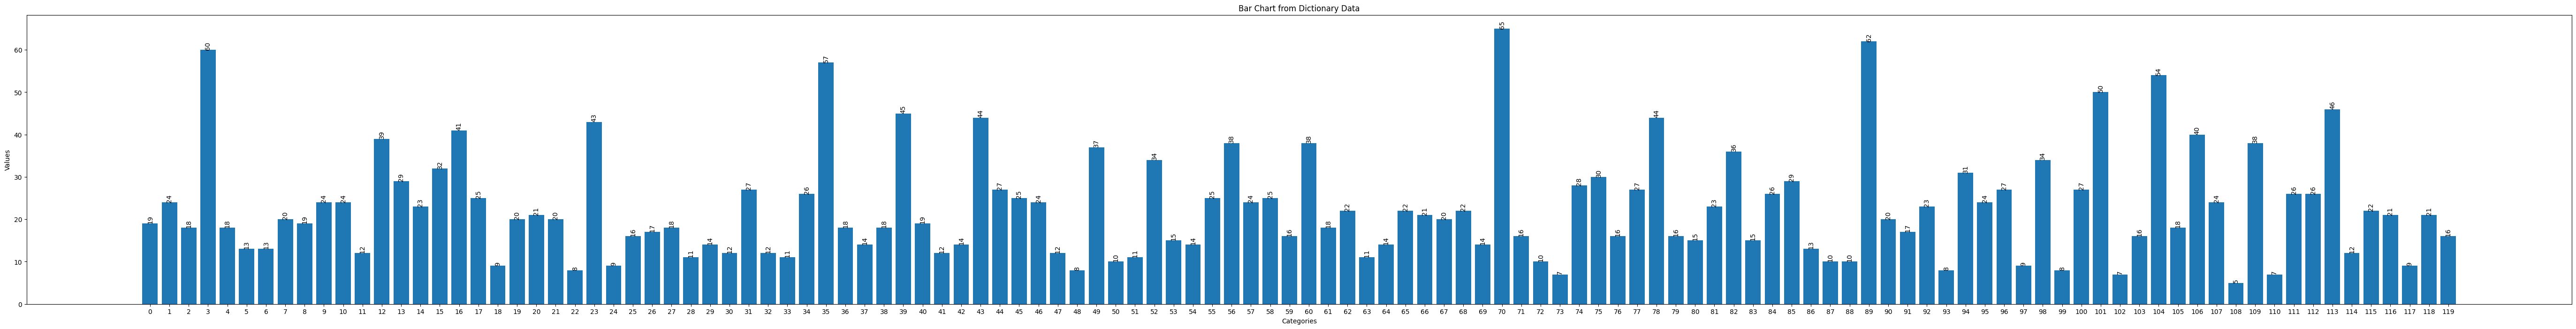

In [49]:
plot_num_of_error_each_cluster(num_of_error_clust_dict=num_of_error_clust_dict, CLuster_list=CLuster_list)

In [50]:

import matplotlib.pyplot as plt

# Sample data


def plot_num_of_train_test_each_cluster(CLuster_list: list, trains: list, tests: list):
# Create a stacked bar chart
    plt.figure(figsize=(width, height))
    plt.bar(CLuster_list, trains, label='Train')
    plt.bar(CLuster_list, tests, bottom=trains, label='Public test')
    for i, value in enumerate(total_images_list):
        plt.text(i, value, str(value), ha='center', va='bottom', rotation = 90)

    title_name = f'Train-Test Proportion each Cluster-{Model_name}_{Num_of_Cluster}'
    plt.xlabel('Cluster')
    plt.ylabel('Images')
    plt.title(title_name)
    plt.legend()
    plt.savefig(f'{save_figure_path}/{title_name}.png', dpi=300)
    # plt.show()

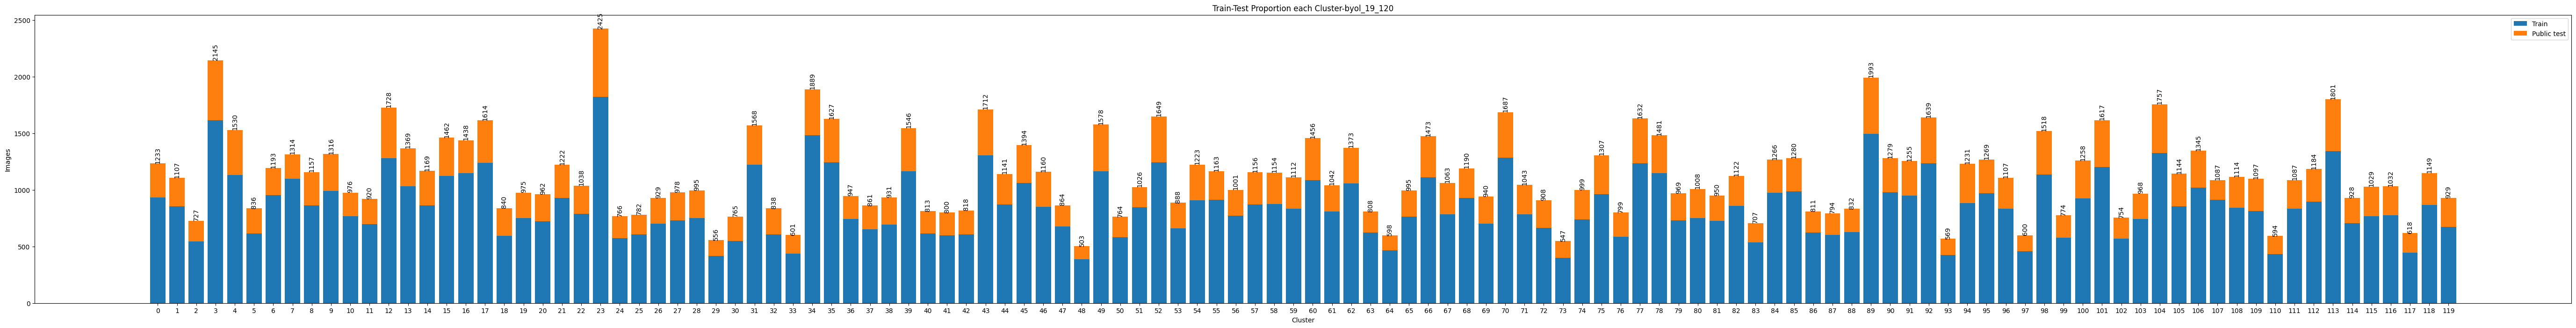

In [51]:
plot_num_of_train_test_each_cluster(CLuster_list=CLuster_list, trains=trains, tests=tests)

In [52]:
def plot_percentage_of_test(CLuster_list: list, tests_percentage: list, name: str):
    plt.figure(figsize=(width, height))
    plt.bar(CLuster_list, tests_percentage, label='Percentage (%)')
    # plt.bar(CLuster_list, tests, bottom=trains, label='Public test')
    title_name = f'{name} Proportion each Cluster in {Model_name}_{Num_of_Cluster}'
    for i, value in enumerate(tests_percentage):
        plt.text(i, value, str(value) +'%', ha='center', va='bottom', rotation = 90)
    plt.xlabel('Cluster')
    plt.ylabel('Percentage (%)')
    # plt.ylim(0,100)
    plt.title(title_name)
    plt.legend()
    plt.savefig(f'{save_figure_path}/{title_name}.png', dpi=300)
    # plt.show()

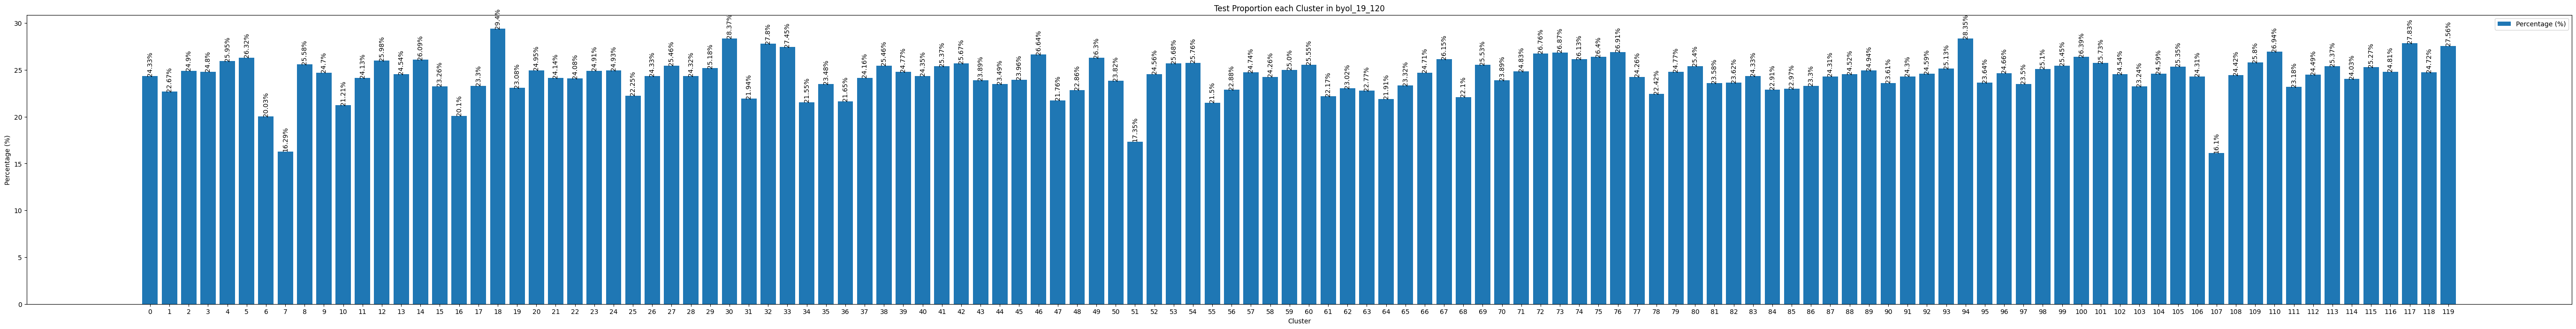

In [53]:
plot_percentage_of_test(CLuster_list, percentages_of_test_in_cluster_list, 'Test')

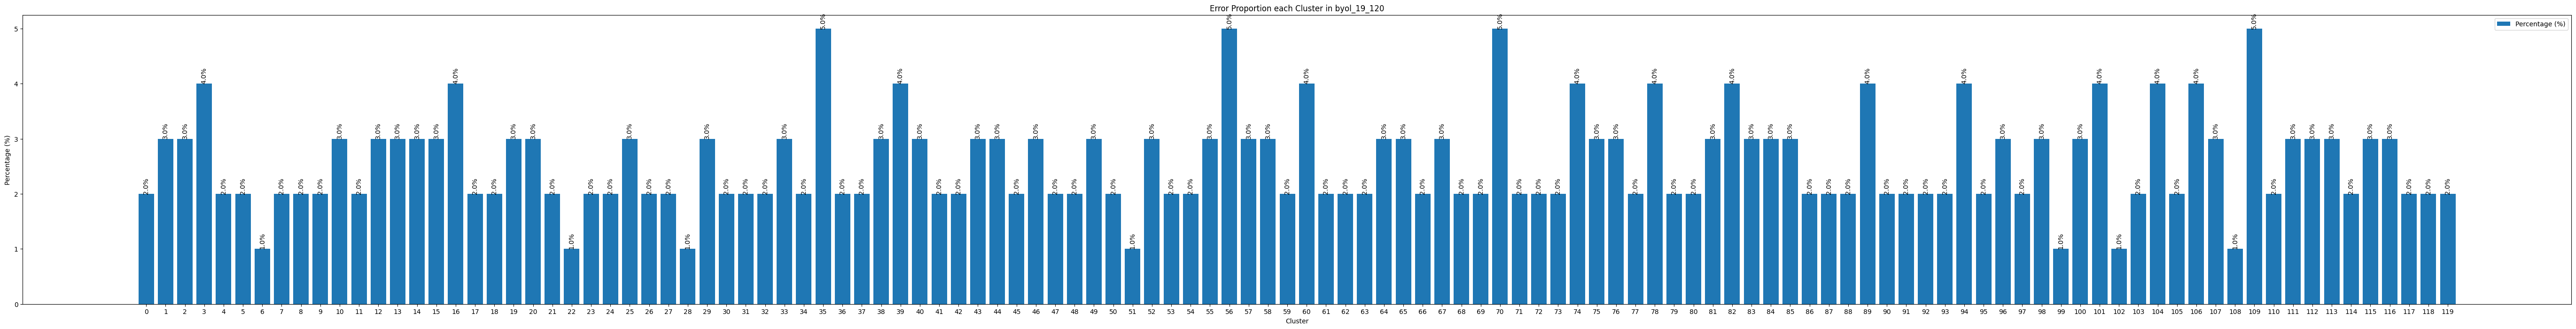

In [54]:
plot_percentage_of_test(CLuster_list, percentage_train_error_dict, 'Error')

In [55]:
# import csv

# with open('/home/nguyen/NTT/OCR/ProPos/DATA/marking.csv', 'r') as file:
#         #Create a CSV reader(file)
#     csv_reader = csv.reader(file)

#         #read the header row
#     header = next(csv_reader)
#     column_path = header.index('path')
#     column_text = header.index('text')

#         #Create a list to store the values in the column
#     Paths = []
#     Texts = []
#     image_text_dict_train = {}
#         # Images = []
#     for row in csv_reader:
#         path = row[column_path]
#         text = row[column_text]
#         paths = path.split('/')
#         name  = paths[len(paths) -1 ]
#         # still old data
#         image_text_dict_train[name] = text
        


In [56]:
# len(image_text_dict_train['train_img_1111.jpg']) #sat

In [57]:
import matplotlib.pyplot as plt
from collections import Counter


# Sample list of strings
# string_list = ["Apple", "banana", "cherBry", "date", 'sạt']
def get_list_percentage_of_character(train :bool, CLuster_list: list, clust_folder: dict):
    capital_percentage_list = []
    non_capital_percentage_list = []
    minus_char_percentage_list = []
    average_word_lenght_list = []
    name = 'train'
    if not train:
        name = 'test'

    for Cluster in CLuster_list:
        
        string_list = []
        word_lenght_list = []
        for file_name in clust_folder[Cluster]:
            if file_name[0:5] == name:
                # image_text_dict: only train
                string_list.append(image_text_dict_adjusted_gt[file_name]) 
                word_lenght_list.append(len(image_text_dict_adjusted_gt[file_name]))
            if file_name[7:11] == name:
                string_list.append(image_text_dict_test[file_name])
                word_lenght_list.append(len(image_text_dict_test[file_name]))
                
                

        average_word_lenght = sum(word_lenght_list) / len(word_lenght_list)
        average_word_lenght_list.append(round(average_word_lenght, 2))
        # print(average_word_lenght)
        # Combine all strings into one
        combined_string = ''.join(string_list)

    # Count the frequency of capital (uppercase) and non-capital (lowercase) characters
        capital_characters = [char for char in combined_string if char.isupper()]
        non_capital_characters = [char for char in combined_string if char.islower()]
        minus_char = [char for char in combined_string if char == '-']
        total_characters = len(combined_string) 
        
        # assert total_characters == len(capital_characters) + len(non_capital_characters) + len(minus_char) 

    # Calculate the percentage of capital and non-capital characters
        capital_percentage = (len(capital_characters) / total_characters) * 100
        non_capital_percentage = (len(non_capital_characters) / total_characters) * 100
        minus_char_percentage = (len(minus_char) / total_characters) * 100
        
        
        capital_percentage_list.append(capital_percentage)
        non_capital_percentage_list.append(non_capital_percentage)
        minus_char_percentage_list.append(minus_char_percentage)
        
    return minus_char_percentage_list, capital_percentage_list, non_capital_percentage_list, average_word_lenght_list
# plt.figure(figsize=(20, 6))
# plt.bar(CLuster_list, non_capital_percentage_list, label='UnCapital Letter', color='b')
# plt.bar(CLuster_list, capital_percentage_list, label='Capital Letter', bottom=non_capital_percentage_list, color='g')
# plt.bar(CLuster_list, minus_char_percentage_list, label='-', bottom=[i + j for i, j in zip(non_capital_percentage_list, capital_percentage_list)], color='r')

# plt.xlabel('Categories')
# plt.ylabel('Percentage (%)')
# plt.title('Chart of Percentage Capital, UnCapital Letter and - sign')
# plt.legend()
# plt.show()

In [58]:
def plot_Per_Capital_UnCapital_(CLuster_list: list, non_capital_percentage_list: list, capital_percentage_list: list, minus_char_percentage_list: list, train: bool):
    plt.figure(figsize=(width, height))
    plt.bar(CLuster_list, non_capital_percentage_list, label='UnCapital Letter', color='b')
    plt.bar(CLuster_list, capital_percentage_list, label='Capital Letter', bottom=non_capital_percentage_list, color='g')
    plt.bar(CLuster_list, minus_char_percentage_list, label='-', bottom=[i + j for i, j in zip(non_capital_percentage_list, capital_percentage_list)], color='r')

    title_name = f'Chart of Percentage Capital, UnCapital Letter and - sign of {Model_name}_{Num_of_Cluster}'
    if not train:
        title_name = f'Chart of Percentage Capital, UnCapital Letter and - sign of {predict_config}'
    plt.xlabel('Categories')
    plt.ylabel('Percentage (%)')
    plt.title(title_name)
    plt.legend()
    plt.savefig(f'{save_figure_path}/{title_name}.png', dpi=300)
    # plt.show()

In [59]:
def plot_average_text_length_each_Cluster(CLuster_list: list, average_word_lenght_list: list, train: bool):
    
    title_name = f'Average leng of char each cluster - {Model_name}_{Num_of_Cluster}'
    if not train:
        title_name = f'Average leng of char each cluster - {predict_config}'
    
    plt.figure(figsize=(width, height))
    plt.bar(CLuster_list, average_word_lenght_list, label='text lenght')
    # plt.bar(CLuster_list, tests, bottom=trains, label='Public test')

    for i, value in enumerate(average_word_lenght_list):
        plt.text(i, value, str(value), ha='center', va='bottom', rotation = 45)
    plt.xlabel('Cluster')
    plt.ylabel('text length')
    # plt.ylim(0,7)
    plt.title(title_name)
    plt.savefig(f'{save_figure_path}/{title_name}.png', dpi=300)
    plt.legend()
    # plt.show()

In [60]:
#plot include Percentage Capital, UnCapital Letter and - sign and  Average leng of char each cluster
def plot_percentage(CLuster_list: list, clust_folder: dict, train: bool):
    
    
    minus_char_percentage_list, capital_percentage_list, non_capital_percentage_list, average_word_lenght_list = get_list_percentage_of_character(train = train, CLuster_list= CLuster_list, clust_folder= clust_folder)
    plot_Per_Capital_UnCapital_(CLuster_list, non_capital_percentage_list, capital_percentage_list, minus_char_percentage_list, train)
    plot_average_text_length_each_Cluster(CLuster_list, average_word_lenght_list, train)
    
    

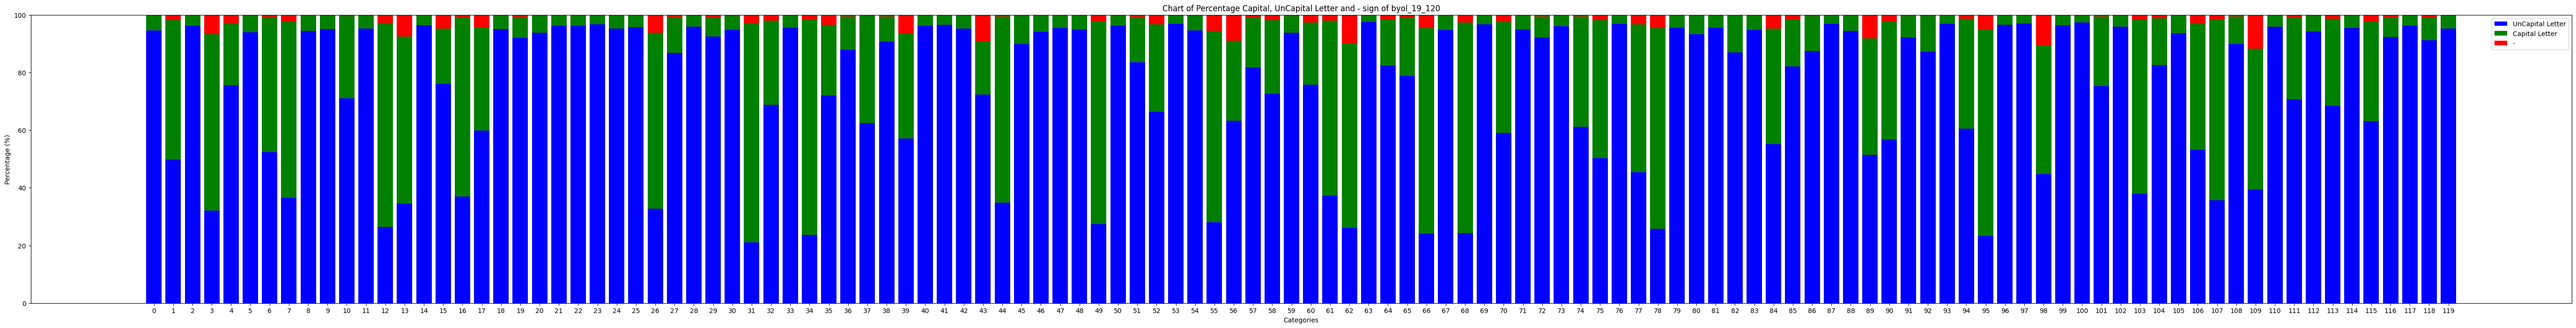

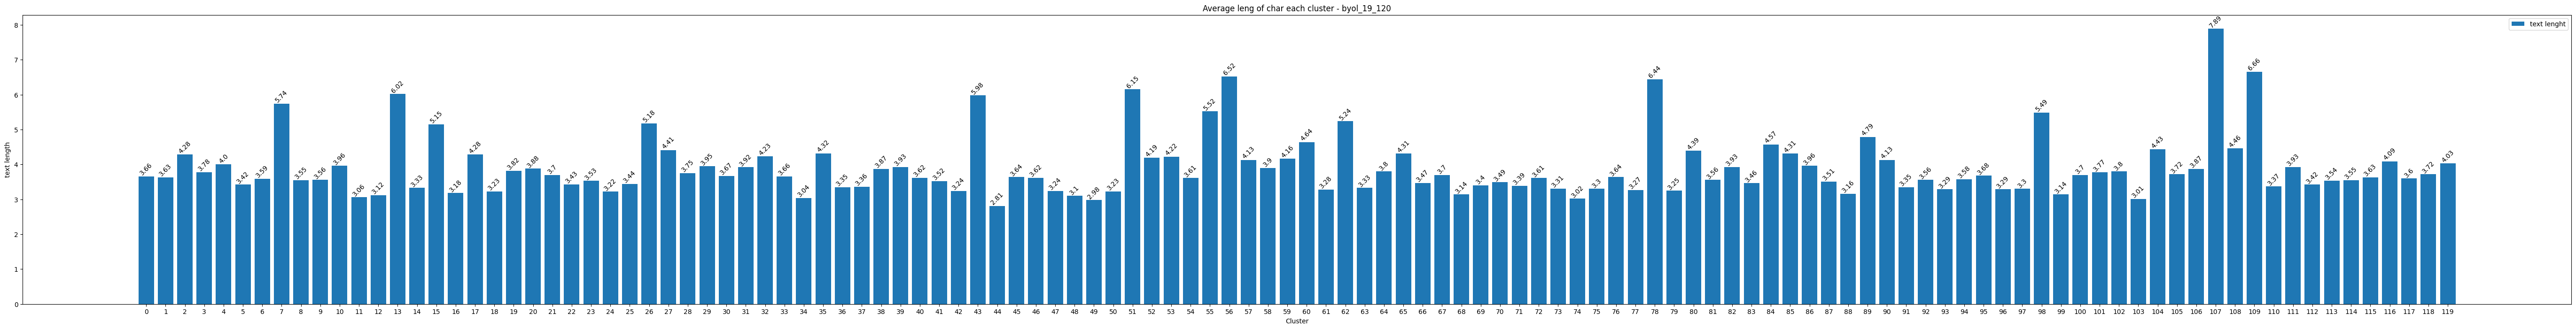

In [61]:
plot_percentage(CLuster_list, clust_folder, train = True)

In [62]:
# plot_percentage(CLuster_list, clust_folder, train = False)

In [63]:

import shutil

def copy_image_to_folder(src_folder: str,  target_path: str, Specify_Clusters: list):
    
    target_path = target_path + f'/{epoch}_{Num_of_Cluster}_'
    # os.mkdir(target_path)
    
    
    for i in Specify_Clusters:
    #make folder
        # public_train_txt = '.txt'
        # public_test_txt = '.txt'
        
        # error_txt = '.txt'
        
        Class_folder = target_path + str(i) 
        Class_folder_train = Class_folder + '/' + 'train'
        Class_folder_test = Class_folder + '/' + 'test'
        Class_folder_error = Class_folder + '/' + 'error'
        os.mkdir(Class_folder)
        
        os.mkdir(Class_folder_train)
        os.mkdir(Class_folder_test)
        os.mkdir(Class_folder_error)
        
        with open(Class_folder + '/' + 'train.txt', 'w') as train_file:
            for file_image_name in clust_folder[str(i)]:
                if file_image_name[0:5] == 'train':
                    print(file_image_name, file= train_file)
                    shutil.copy(src_folder + file_image_name, Class_folder_train)
        
        with open(Class_folder + '/' + 'test.txt', 'w') as test_file:
            for file_image_name in clust_folder[str(i)]:
                if file_image_name[7:11] == 'test':
                    print(file_image_name, file=test_file)
                    shutil.copy(src_folder + file_image_name, Class_folder_test)
        
        with open(Class_folder + '/' + 'error.txt', 'w') as error_file:
            for file_image_error in error_clust_folder[str(i)]:    
                print(file_image_name, file=error_file)
                shutil.copy(src_folder + file_image_error, Class_folder_error)
                current_file_name = f'{Class_folder_error}/{file_image_error}'
                new_file_name = f'{Class_folder_error}/{file_image_error.split(".")[0]}_{image_text_dict_adjusted_gt[file_image_error]}_{image_text_dict_pred_train[file_image_error]}.{file_image_error.split(".")[1]}'
                os.rename(current_file_name, new_file_name)

In [64]:
# def cvt_2_txt(Specify_Clusters: str, target_path: str):
#     Class_folder = 

In [ ]:
Top_n = 20
# Sort dict by value
sorted_percentage_train_error_dict = dict(sorted(percentage_train_error_dict.items(), key=lambda item: item[1], reverse=True))
Specify_Clusters = []
idx = 0
for cluster in sorted_percentage_train_error_dict:
    Specify_Clusters.append[cluster]
    idx += 1
    if idx >= 20:
        break

print(len(Specify_Clusters))

print(Specify_Clusters)


In [65]:
# Specify_Clusters = ['23', '52', '65', '112', ]
# Specify_Clusters = ['15', '21', '31', '32', '52', '60', '88', '97', '103', '113']
# Specify_Clusters = [4, 8, 22, 27, 40, 45, 47, 65, 103, 144]

# Specify_Clusters = [2,3, 15, 33, 35, 39, 43, 44, 48, 56, 57, 82, 85, 89, 94, 96, 109, 116] #resnet_seq2seq_ema_valid
# Specify_Clusters = [3, 16, 35, 39, 56, 70, 74, 78, 82, 89, 94, 101, 104, 106, 109] #resnet_seq2seq_ema-train
src_folder = '/home/nguyen/NTT/OCR/ProPos/DATA/ocr_dataset/new_train/'
target_path = f'/home/nguyen/NTT/OCR/ProPos/Cluster_folder/ProNos_resnet50_v2/{Model_name}' + f'/{predict_train_file_paths_config}'
creat_dir(target_path)
target_path = target_path + f'/{Num_of_Cluster}'
creat_dir(target_path)
copy_image_to_folder(src_folder, target_path, Specify_Clusters)

In [66]:
# import matplotlib.pyplot as plt
# from collections import Counter

# # Sample list of strings
# # string_list = ["Apple", "banana", "cherBry", "date", 'sạt']

# for Cluster in CLuster_list:
    
#     string_list = []
#     word_lenght_list = []
#     for file_name in clust_folder[Cluster]:
#         if file_name[0:5] == 'train':
#             string_list.append(image_text_dict[file_name])
#             word_lenght_list.append(len(image_text_dict[file_name]))
            

#     average_word_lenght = sum(word_lenght_list) / len(word_lenght_list)
#     print(average_word_lenght)
#     # Combine all strings into one
#     combined_string = ''.join(string_list)
#     capital_characters = [char for char in combined_string if char.isupper()]
    # non_capital_characters = [char for char in combined_string if char.islower()]
    # total_characters = len(combined_string)

    
    # capital_percentage = (len(capital_characters) / total_characters) * 100
    # non_capital_percentage = (len(non_capital_characters) / total_characters) * 100
    
    
    # # Count the frequency of each character
    # char_counter = Counter(combined_string)

    # # Separate the characters and their counts
    # characters, counts = zip(*char_counter.items())

    # # Sort the characters alphabetically
    # sorted_characters, sorted_counts = zip(*sorted(zip(characters, counts)))

    # # Plot the distribution of characters
    # plt.figure(figsize=(40, 10))
    # plt.bar(sorted_characters, sorted_counts)
    # plt.xlabel('Character')
    # plt.ylabel('Count')
    # plt.title('Character Distribution in List of Strings (Sorted Alphabetically) of clust ' + Cluster)
    # plt.show()